#  Data Loading

In [1]:
# ========================
# Step 1: Import Libraries
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries (we'll use later)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error


In [2]:
# ========================
# Step 2: Load Dataset
# ========================
file_path = "/kaggle/input/hr-data-mnc/HR_Data_MNC_Data Science Lovers.csv"
df = pd.read_csv(file_path)

# Sample 30,000 rows only
df = df.sample(n=30000, random_state=42).reset_index(drop=True)

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (30000, 12)


,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,1828401,EMP1828402,Tracie Galloway,IT,DevOps Engineer,2022-06-13,"Allisonfort, South Georgia and the South Sandw...",2,3,Active,Remote,473938
1,1200071,EMP1200072,Amanda Smith,IT,Software Engineer,2021-05-02,"Andreaton, Bosnia and Herzegovina",2,4,Active,On-site,1066321
2,194849,EMP0194850,Charles Thompson,IT,Software Engineer,2018-08-12,"East Marisaton, Greenland",4,7,Active,On-site,622779
3,1629054,EMP1629055,James Williams,HR,Talent Acquisition Specialist,2011-10-03,"Diazshire, Samoa",3,13,Active,Remote,947423
4,191144,EMP0191145,Mr. Jeffrey Snyder,Sales,Account Manager,2022-06-07,"New Laura, Denmark",5,3,Active,Remote,436052


In [3]:
# ========================
# Step 3: Clean Dataset
# ========================

# Drop useless column
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Convert Hire_Date to datetime
df["Hire_Date"] = pd.to_datetime(df["Hire_Date"], errors="coerce")

# Create new feature: Hire_Year
df["Hire_Year"] = df["Hire_Date"].dt.year

# Check missing values
print(df.isnull().sum())


Employee_ID           0
Full_Name             0
Department            0
Job_Title             0
Hire_Date             0
Location              0
Performance_Rating    0
Experience_Years      0
Status                0
Work_Mode             0
Salary_INR            0
Hire_Year             0
dtype: int64


In [4]:
# ========================
# Step 4: Quick Overview
# ========================

print(df.info())
print(df.describe(include="all").T)

# Preview unique values in categorical columns
for col in ["Department","Job_Title","Status","Work_Mode","Location"]:
    print(f"\n{col} unique values: {df[col].nunique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Employee_ID         30000 non-null  object        
 1   Full_Name           30000 non-null  object        
 2   Department          30000 non-null  object        
 3   Job_Title           30000 non-null  object        
 4   Hire_Date           30000 non-null  datetime64[ns]
 5   Location            30000 non-null  object        
 6   Performance_Rating  30000 non-null  int64         
 7   Experience_Years    30000 non-null  int64         
 8   Status              30000 non-null  object        
 9   Work_Mode           30000 non-null  object        
 10  Salary_INR          30000 non-null  int64         
 11  Hire_Year           30000 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(7)
memory usage: 2.6+ MB
None
                      c

# EDA

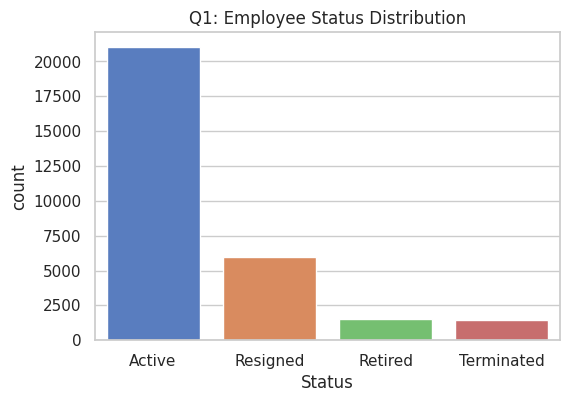

Status
Active        21044
Resigned       5991
Retired        1497
Terminated     1468
Name: count, dtype: int64


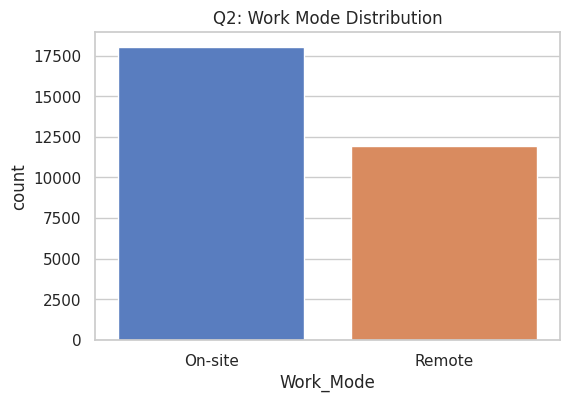

Work_Mode
On-site    18052
Remote     11948
Name: count, dtype: int64


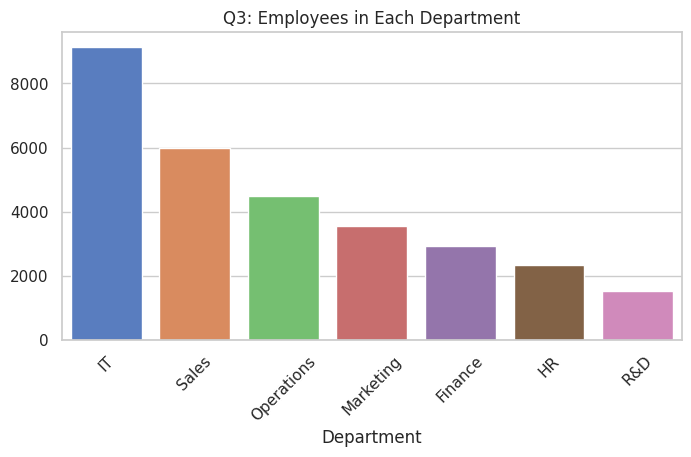

Department
IT            9144
Sales         5995
Operations    4495
Marketing     3565
Finance       2940
HR            2340
R&D           1521
Name: count, dtype: int64


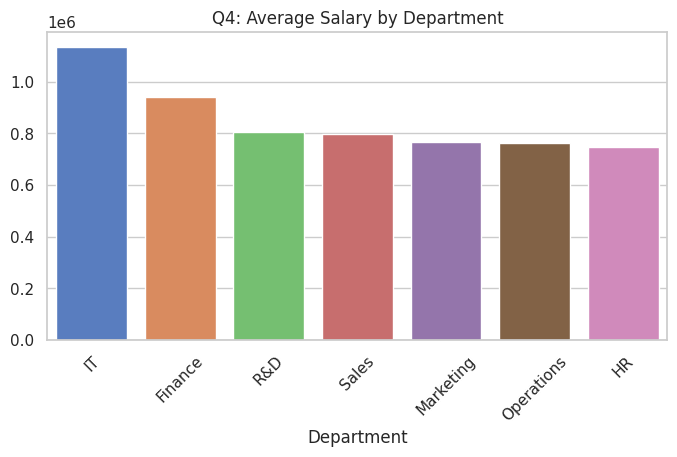

Department
IT            1.135847e+06
Finance       9.431161e+05
R&D           8.063146e+05
Sales         7.961843e+05
Marketing     7.667727e+05
Operations    7.621799e+05
HR            7.469964e+05
Name: Salary_INR, dtype: float64
Q5: Job Title with highest avg salary = IT Manager (2,092,106.39 INR)


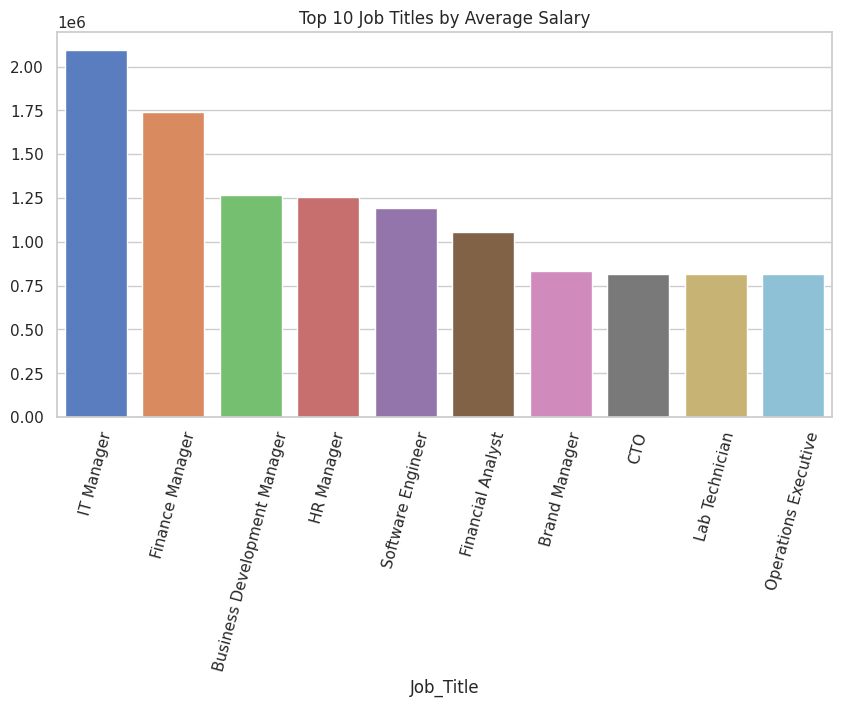

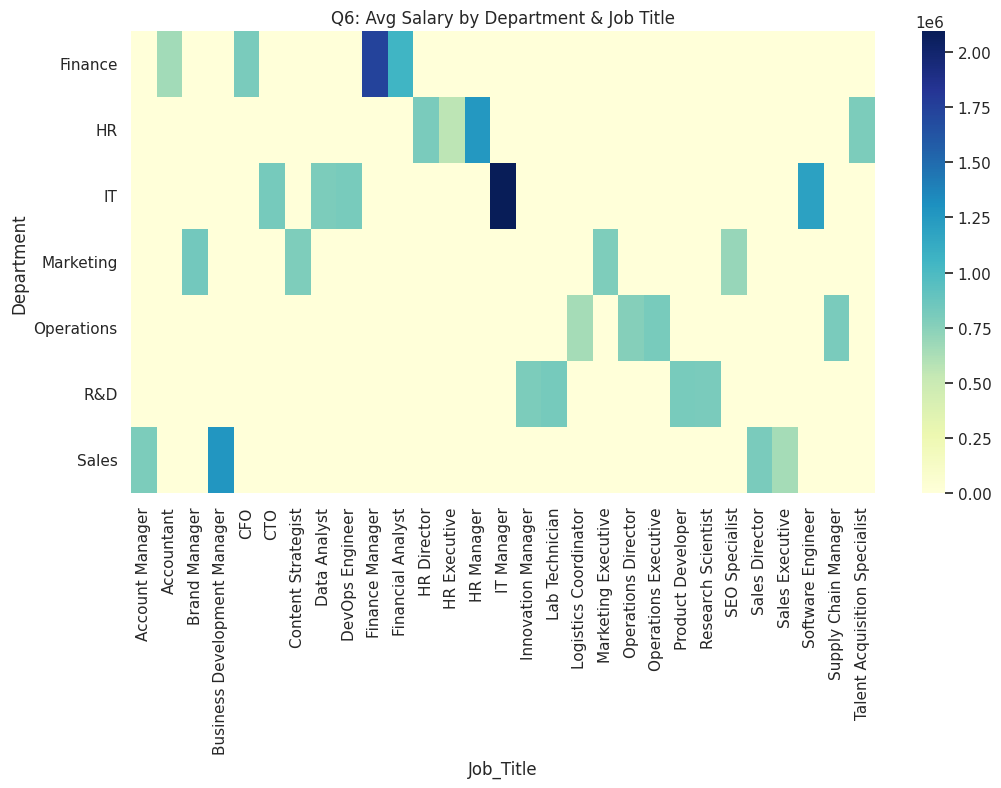

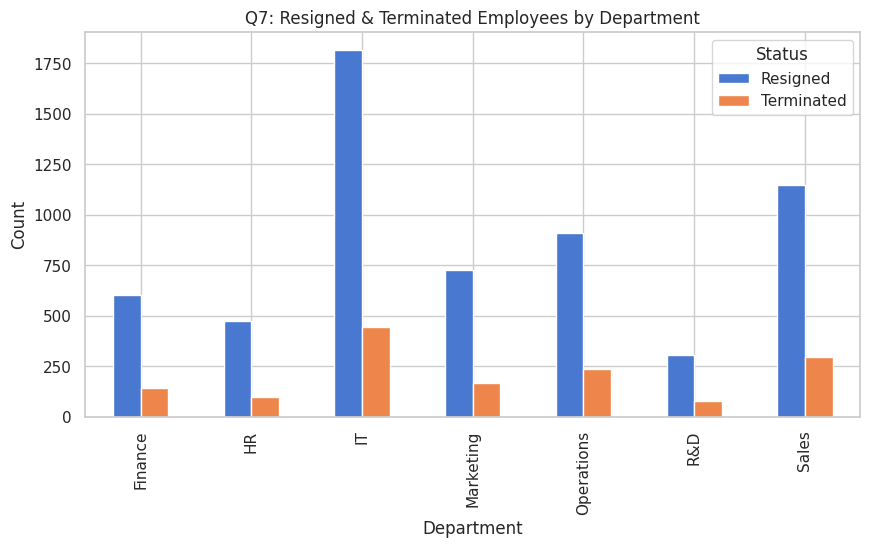

Status      Resigned  Terminated
Department                      
Finance          604         143
HR               473         100
IT              1815         444
Marketing        730         167
Operations       913         236
R&D              308          81
Sales           1148         297


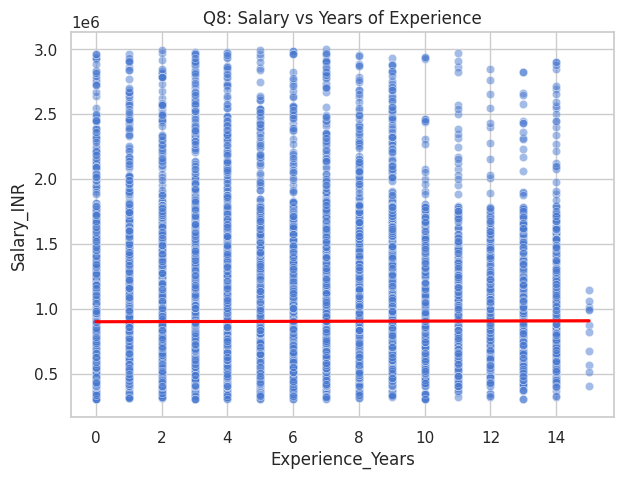

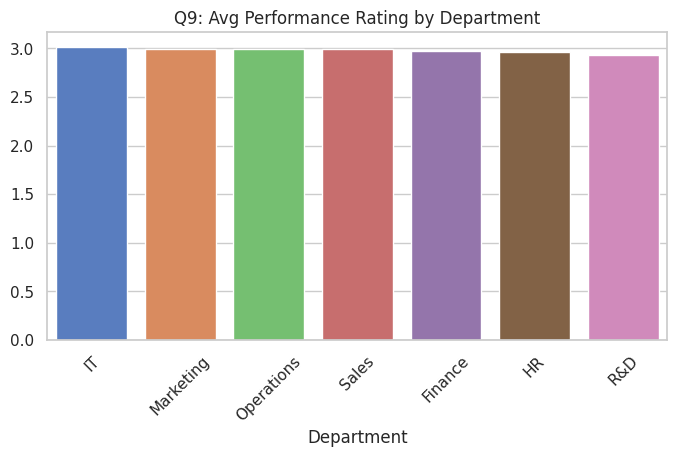

Department
IT            3.015639
Marketing     2.991865
Operations    2.989989
Sales         2.989825
Finance       2.967687
HR            2.961538
R&D           2.933596
Name: Performance_Rating, dtype: float64


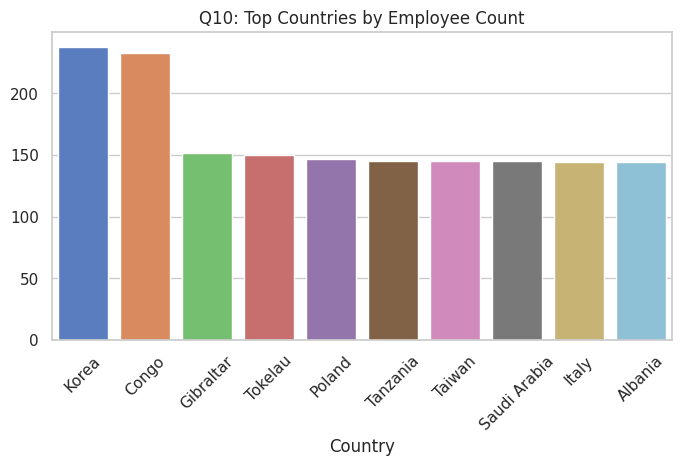

Country
Korea           238
Congo           233
Gibraltar       152
Tokelau         150
Poland          147
Tanzania        145
Taiwan          145
Saudi Arabia    145
Italy           144
Albania         144
Name: count, dtype: int64
Q11: Correlation = 0.01


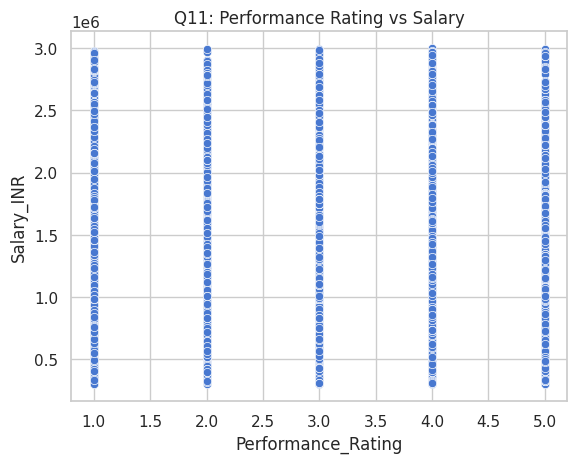

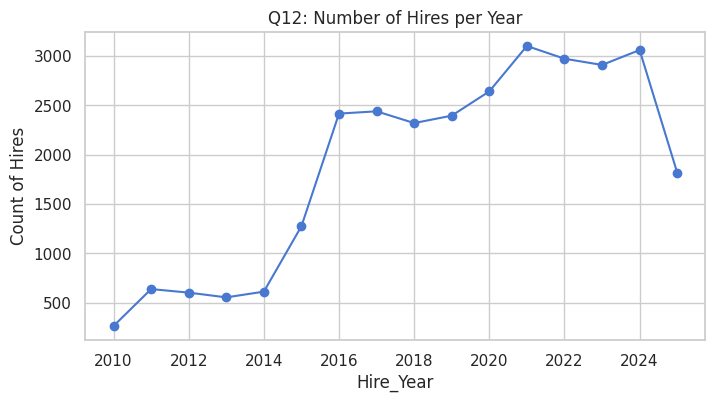

Hire_Year
2010     263
2011     637
2012     601
2013     553
2014     611
2015    1274
2016    2415
2017    2438
2018    2319
2019    2394
2020    2640
2021    3100
2022    2971
2023    2908
2024    3059
2025    1817
Name: Employee_ID, dtype: int64


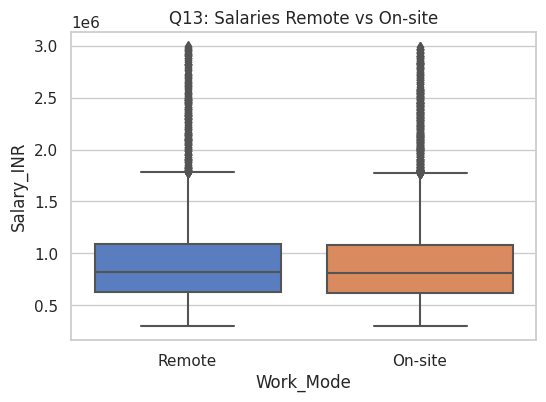

Work_Mode
On-site    899867.808941
Remote     905722.666974
Name: Salary_INR, dtype: float64
Q14: Top 10 highest salaries per department
   Department          Full_Name        Job_Title  Salary_INR
0     Finance        Brian Hurst  Finance Manager     2491304
1     Finance         David Wood  Finance Manager     2482403
2     Finance  Kimberly Martinez  Finance Manager     2481652
3     Finance       Paul Jackson  Finance Manager     2479216
4     Finance    William Schmidt  Finance Manager     2475210
5     Finance   Travis Hernandez  Finance Manager     2474223
6     Finance       Larry Torres  Finance Manager     2464395
7     Finance     Derek Hamilton  Finance Manager     2463290
8     Finance     Kenneth Wilson  Finance Manager     2459213
9     Finance      Shelly Zuniga  Finance Manager     2458436
10         HR       Sean Beltran       HR Manager     1798764
11         HR         David Shaw       HR Manager     1789661
12         HR    Thomas Thompson       HR Manager     178

/tmp/ipykernel_19/793766853.py:168: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10 = df.groupby("Department").apply(lambda x: x.nlargest(10, "Salary_INR")).reset_index(drop=True)


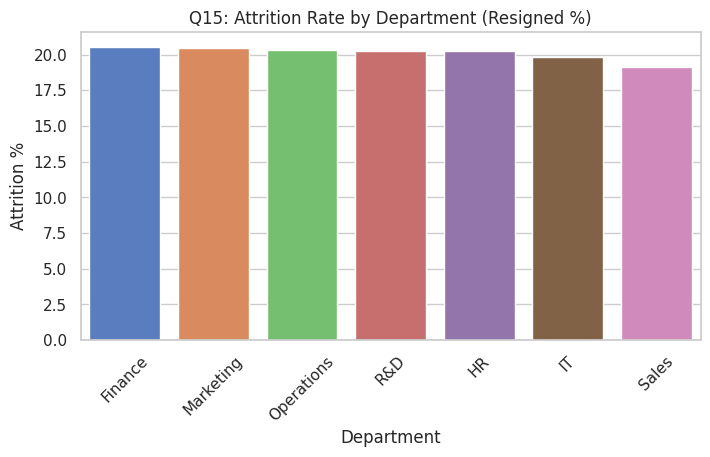

Department
Finance       20.544218
Marketing     20.476858
Operations    20.311457
R&D           20.249836
HR            20.213675
IT            19.849081
Sales         19.149291
Name: Employee_ID, dtype: float64


In [5]:
# ========================
# Step 1: Import Libraries
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

# ========================
# Step 2: Load & Prepare Dataset
# ========================
file_path = "/kaggle/input/hr-data-mnc/HR_Data_MNC_Data Science Lovers.csv"
df = pd.read_csv(file_path)

# Work with 30k rows only
df = df.sample(n=30000, random_state=42).reset_index(drop=True)

# Drop useless column
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Convert Hire_Date
df["Hire_Date"] = pd.to_datetime(df["Hire_Date"], errors="coerce")
df["Hire_Year"] = df["Hire_Date"].dt.year

# Extract Country
df["Country"] = df["Location"].apply(lambda x: str(x).split(",")[-1].strip())

# ========================
# Q1: Employee Status Distribution
# ========================
plt.figure(figsize=(6,4))
sns.countplot(x="Status", data=df, order=df["Status"].value_counts().index)
plt.title("Q1: Employee Status Distribution")
plt.show()
print(df["Status"].value_counts())

# ========================
# Q2: Work Mode Distribution
# ========================
plt.figure(figsize=(6,4))
sns.countplot(x="Work_Mode", data=df, order=df["Work_Mode"].value_counts().index)
plt.title("Q2: Work Mode Distribution")
plt.show()
print(df["Work_Mode"].value_counts())

# ========================
# Q3: Employees per Department
# ========================
dept_counts = df["Department"].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=dept_counts.index, y=dept_counts.values)
plt.title("Q3: Employees in Each Department")
plt.xticks(rotation=45)
plt.show()
print(dept_counts)

# ========================
# Q4: Average Salary by Department
# ========================
avg_salary_dept = df.groupby("Department")["Salary_INR"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=avg_salary_dept.index, y=avg_salary_dept.values)
plt.title("Q4: Average Salary by Department")
plt.xticks(rotation=45)
plt.show()
print(avg_salary_dept)

# ========================
# Q5: Job Title with Highest Average Salary
# ========================
avg_salary_title = df.groupby("Job_Title")["Salary_INR"].mean().sort_values(ascending=False)
print("Q5: Job Title with highest avg salary =", avg_salary_title.idxmax(), 
      f"({avg_salary_title.max():,.2f} INR)")

plt.figure(figsize=(10,5))
sns.barplot(x=avg_salary_title.head(10).index, y=avg_salary_title.head(10).values)
plt.title("Top 10 Job Titles by Average Salary")
plt.xticks(rotation=75)
plt.show()

# ========================
# Q6: Avg Salary in Departments by Job Title
# ========================
pivot = df.groupby(["Department","Job_Title"])["Salary_INR"].mean().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(pivot.fillna(0), cmap="YlGnBu")
plt.title("Q6: Avg Salary by Department & Job Title")
plt.show()

# ========================
# Q7: Resigned & Terminated Employees by Department
# ========================
resign_terminate = df[df["Status"].isin(["Resigned","Terminated"])]
counts = resign_terminate.groupby(["Department","Status"])["Employee_ID"].count().unstack().fillna(0)
counts.plot(kind="bar", figsize=(10,5))
plt.title("Q7: Resigned & Terminated Employees by Department")
plt.ylabel("Count")
plt.show()
print(counts)

# ========================
# Q8: Salary vs Experience
# ========================
plt.figure(figsize=(7,5))
sns.scatterplot(x="Experience_Years", y="Salary_INR", data=df, alpha=0.5)
sns.regplot(x="Experience_Years", y="Salary_INR", data=df, scatter=False, color="red")
plt.title("Q8: Salary vs Years of Experience")
plt.show()

# ========================
# Q9: Avg Performance Rating by Department
# ========================
avg_perf = df.groupby("Department")["Performance_Rating"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=avg_perf.index, y=avg_perf.values)
plt.title("Q9: Avg Performance Rating by Department")
plt.xticks(rotation=45)
plt.show()
print(avg_perf)

# ========================
# Q10: Country with Highest Employees
# ========================
country_counts = df["Country"].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values)
plt.title("Q10: Top Countries by Employee Count")
plt.xticks(rotation=45)
plt.show()
print(country_counts.head(10))

# ========================
# Q11: Correlation between Performance & Salary
# ========================
corr = df["Salary_INR"].corr(df["Performance_Rating"])
print(f"Q11: Correlation = {corr:.2f}")
sns.scatterplot(x="Performance_Rating", y="Salary_INR", data=df)
plt.title("Q11: Performance Rating vs Salary")
plt.show()

# ========================
# Q12: Number of Hires per Year
# ========================
hire_trend = df.groupby("Hire_Year")["Employee_ID"].count()
plt.figure(figsize=(8,4))
hire_trend.plot(kind="line", marker="o")
plt.title("Q12: Number of Hires per Year")
plt.ylabel("Count of Hires")
plt.show()
print(hire_trend)

# ========================
# Q13: Remote vs On-site Salaries
# ========================
plt.figure(figsize=(6,4))
sns.boxplot(x="Work_Mode", y="Salary_INR", data=df)
plt.title("Q13: Salaries Remote vs On-site")
plt.show()
avg_salary_mode = df.groupby("Work_Mode")["Salary_INR"].mean()
print(avg_salary_mode)

# ========================
# Q14: Top 10 Salaries per Department
# ========================
top10 = df.groupby("Department").apply(lambda x: x.nlargest(10, "Salary_INR")).reset_index(drop=True)
print("Q14: Top 10 highest salaries per department")
print(top10[["Department","Full_Name","Job_Title","Salary_INR"]].head(20))

# ========================
# Q15: Departments with Highest Attrition Rate
# ========================
total_dept = df.groupby("Department")["Employee_ID"].count()
resigned_dept = df[df["Status"]=="Resigned"].groupby("Department")["Employee_ID"].count()
attrition_rate = (resigned_dept / total_dept * 100).fillna(0).sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values)
plt.title("Q15: Attrition Rate by Department (Resigned %)")
plt.xticks(rotation=45)
plt.ylabel("Attrition %")
plt.show()
print(attrition_rate)


# Machine Learning Models

=== Attrition Prediction (Classification) ===
Accuracy: 0.7421666666666666
Precision: 0.31788079470198677
Recall: 0.032171581769437
F1 Score: 0.05842970176506391


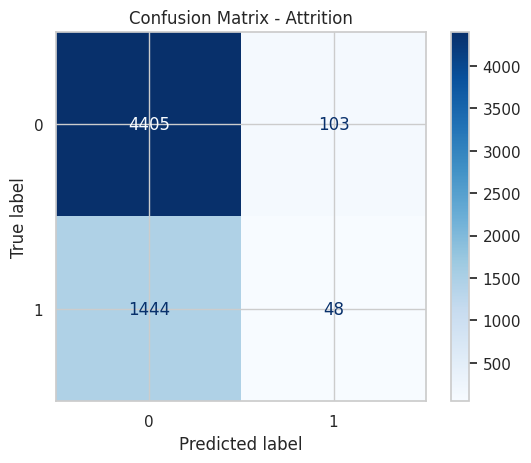

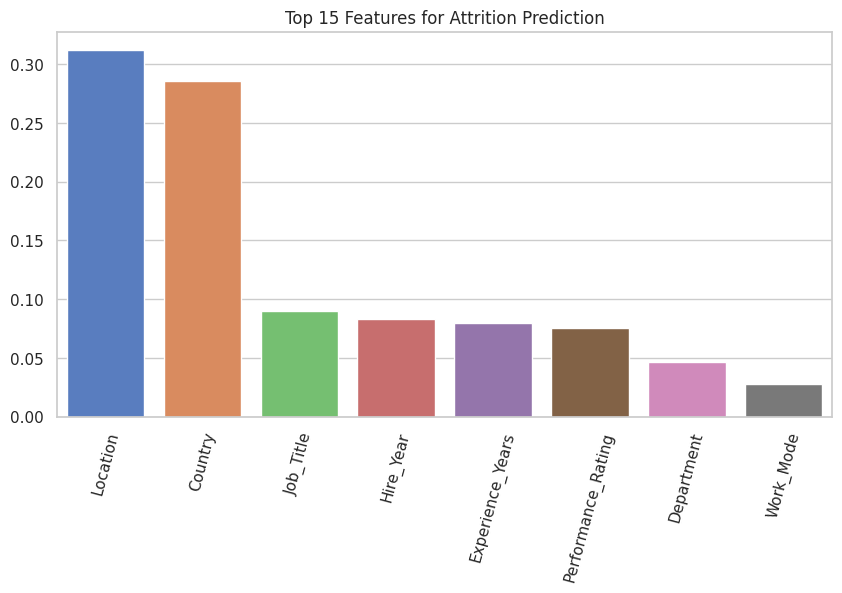


=== Salary Prediction (Regression) ===
MAE: 220392.53514
RMSE: 273939.19968444505
R²: 0.5520814251810808


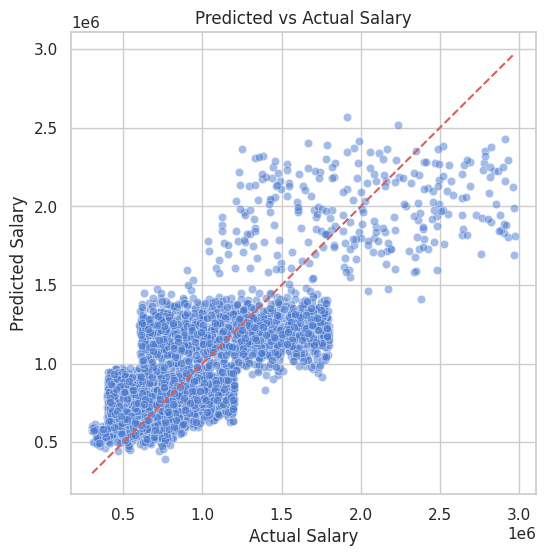

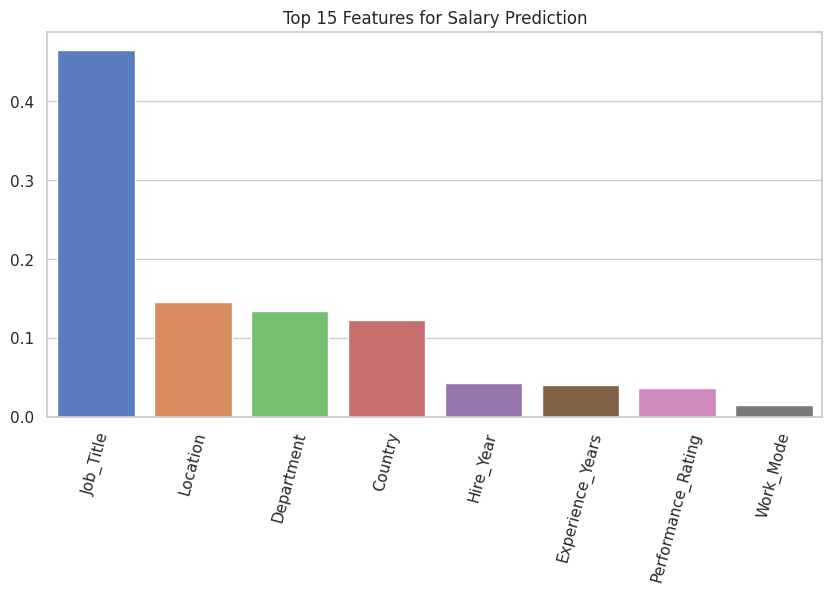

In [6]:
# ========================
# Step 1: Import Libraries
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay,
                             mean_absolute_error, mean_squared_error, r2_score)

sns.set(style="whitegrid", palette="muted")

# ========================
# Step 2: Load Dataset (30k rows)
# ========================
file_path = "/kaggle/input/hr-data-mnc/HR_Data_MNC_Data Science Lovers.csv"
df = pd.read_csv(file_path)
df = df.sample(n=30000, random_state=42).reset_index(drop=True)

# Drop useless columns
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Convert dates
df["Hire_Date"] = pd.to_datetime(df["Hire_Date"], errors="coerce")
df["Hire_Year"] = df["Hire_Date"].dt.year

# Extract country from location
df["Country"] = df["Location"].apply(lambda x: str(x).split(",")[-1].strip())

# ========================
# Step 3: Encode Categorical Variables
# ========================
categorical_cols = ["Department","Job_Title","Work_Mode","Location","Country"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# ========================
# Step 4: Attrition Column (Target for Classification)
# ========================
# Target: 1 if Resigned or Terminated, 0 if Active
status_active = "Active"
status_resigned = "Resigned"
status_terminated = "Terminated"

# Map Status to Attrition
df["Attrition"] = df["Status"].apply(lambda x: 1 if x in [status_resigned, status_terminated] else 0)

# ========================
# Step 5: Prepare Features & Target
# ========================
# Drop columns that are not usable as features
drop_cols = ["Employee_ID","Full_Name","Hire_Date","Status","Attrition","Salary_INR"]

X_clf = df.drop(columns=drop_cols)
y_clf = df["Attrition"]

X_reg = df.drop(columns=drop_cols + ["Salary_INR"])
y_reg = df["Salary_INR"]

# ========================
# Step 6: Scale Features
# ========================
scaler = StandardScaler()
X_clf_scaled = scaler.fit_transform(X_clf)
X_reg_scaled = scaler.fit_transform(X_reg)

# ========================
# Model 1: Attrition Prediction (Classification)
# ========================
X_train, X_test, y_train, y_test = train_test_split(X_clf_scaled, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
print("=== Attrition Prediction (Classification) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix - Attrition")
plt.show()

# Feature Importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
sns.barplot(x=X_clf.columns[indices][:15], y=importances[indices][:15])
plt.title("Top 15 Features for Attrition Prediction")
plt.xticks(rotation=75)
plt.show()

# ========================
# Model 2: Salary Prediction (Regression)
# ========================
X_train, X_test, y_train, y_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

reg = RandomForestRegressor(n_estimators=200, random_state=42)
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
r2 = r2_score(y_test, y_pred_reg)

print("\n=== Salary Prediction (Regression) ===")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

# Scatter plot Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_reg, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs Actual Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Feature Importance
importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
sns.barplot(x=X_reg.columns[indices][:15], y=importances[indices][:15])
plt.title("Top 15 Features for Salary Prediction")
plt.xticks(rotation=75)
plt.show()


# Model Comparison & Hyperparameter Tuning

In [7]:
# ========================
# Step 1: Import Libraries
# ========================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Already have X_clf_scaled, y_clf (Attrition), X_reg_scaled, y_reg (Salary) from Part 3


# Classification – Attrition Prediction

=== Classification Model Comparison ===
                    Accuracy  F1_Score
DecisionTree        0.628833  0.272460
RandomForest        0.741833  0.065178
GradientBoosting    0.750667  0.001335
LogisticRegression  0.751333  0.000000


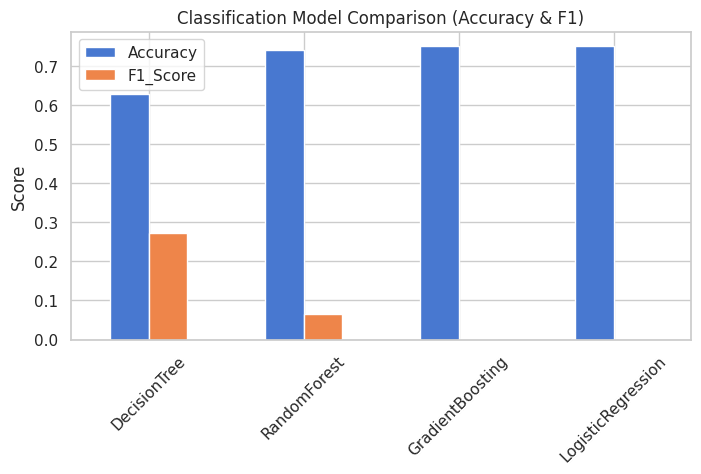

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clf_scaled, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# Define models to compare
clf_models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

# Dictionary to store results
clf_results = {}

for name, model in clf_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    clf_results[name] = {"Accuracy": acc, "F1_Score": f1}

# Show results
clf_results_df = pd.DataFrame(clf_results).T.sort_values("F1_Score", ascending=False)
print("=== Classification Model Comparison ===")
print(clf_results_df)

# Plot
clf_results_df.plot(kind="bar", figsize=(8,4))
plt.title("Classification Model Comparison (Accuracy & F1)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


In [9]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5]
}

grid_clf = GridSearchCV(RandomForestClassifier(random_state=42),
                        param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_clf.fit(X_train, y_train)

print("Best params (RF Classifier):", grid_clf.best_params_)
best_rf = grid_clf.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("F1 Score after tuning:", f1_score(y_test, y_pred_best))


Best params (RF Classifier): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
F1 Score after tuning: 0.06517803258901629


# Regression – Salary Prediction

=== Regression Model Comparison ===
                           RMSE        R2
GradientBoosting  263623.945689  0.585179
RandomForest      274825.171921  0.549179
DecisionTree      372634.741413  0.171185


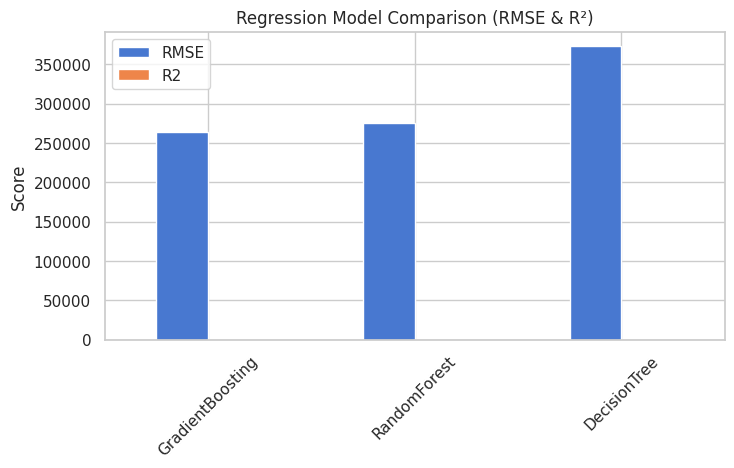

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Define models to compare
reg_models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

reg_results = {}

for name, model in reg_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    reg_results[name] = {"RMSE": rmse, "R2": r2}

# Show results
reg_results_df = pd.DataFrame(reg_results).T.sort_values("R2", ascending=False)
print("=== Regression Model Comparison ===")
print(reg_results_df)

# Plot
reg_results_df.plot(kind="bar", figsize=(8,4))
plt.title("Regression Model Comparison (RMSE & R²)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


In [11]:
param_grid_reg = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5]
}

grid_reg = GridSearchCV(RandomForestRegressor(random_state=42),
                        param_grid_reg, cv=3, scoring='r2', n_jobs=-1)
grid_reg.fit(X_train, y_train)

print("Best params (RF Regressor):", grid_reg.best_params_)
best_rf_reg = grid_reg.best_estimator_
y_pred_best_reg = best_rf_reg.predict(X_test)
print("R² after tuning:", r2_score(y_test, y_pred_best_reg))


Best params (RF Regressor): {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
R² after tuning: 0.5882937910365338
